# Customer Segmentation with Deployment using streamlit 

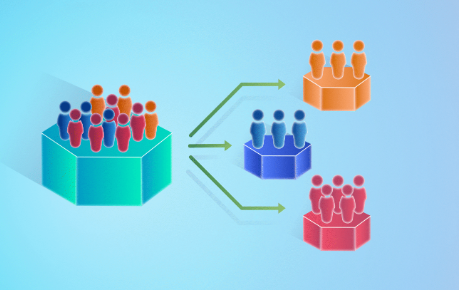

# In this project  i will be using K-Means clustering on given dataset to form the clusters. Then analyse the clusters for insights and do customer profiling. Then i will create a model using GradientBoosting Regressor to predict the cluster for new customer. I will creat a pipeline of all the code and deploy it using streamlit.



# Import Required Libraries 

In [14]:
import pandas as pd
import numpy as np 

## Pandas - For data analysis 
## Numpy - Numerical Python library for Linear Algebra and other mathematical Computations

## Visualization Libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
from datetime import date, datetime

## For manipulating date and time columns

In [17]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## For handling categorical column and scaling numeric columns


## Libraries for clustering and evaluation

In [4]:
import numpy as np
import sklearn

print("NumPy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 1.24.3
Scikit-learn version: 1.3.0


## Libraries for clustering and model evaluation

In [3]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import sklearn
print(sklearn.__version__)

1.3.0


## It will prevent kernel from dispalying and warnings message 

In [19]:
import warnings
warnings.filterwarnings("ignore")

# Load the dataset to our pandas dataframe

In [20]:
data = pd.read_csv("marketing_campaign.csv")

## Display the first 5 coulmns of our dataset 

In [21]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Display the last 5 columns of our dataset 

In [22]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


#                     Initial Data Analysis

## 1. Check the shape of our dataset

In [23]:
data.shape

(2240, 29)

## 2. Info our dataset

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 3. Check for any missing values

In [25]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## 4. How does the data looks Mathematically

In [26]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## 5. Check for duplicate values

In [27]:
data.duplicated().sum()

0

## 6. Print the random rows of our dataset

In [28]:
data.sample()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1182,1829,1961,PhD,Divorced,54959.0,0,1,19-01-2013,55,1148,...,7,0,1,0,0,0,0,3,11,1


# Observations from the initial data analysis

## 1. Dataset contains 2240 rows with 29 columns
## 2. It has 1 float 3 object and 25 int columns
## 3. Datetime columns have int datatype, we need to change and fix it 
## 4. There are 24 missing values in the Income column
## 5. Many categorical columns are alredy in int format, like AcceptedCmp1, AcceptedCmp2 so on and Response 
## 6. There are no duplicate values in the dataset 

# Data Cleaning and Feature construction

## Steps involved in data cleaning

## Step 1:- Firstly fix the column names which is not in  correct format 
## Step 2:- convert the datetime column into correct format
## Step 3:- Then take care of the missing values
## Step 4:- Examine the unique values within categorical columns
## Step 5:- Check the timeline of the data since we have datetime columns given

### Rename the column into correct form

In [29]:
data.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

### Converting into datetime format

In [30]:
data['Year_Birth'] = pd.to_datetime(data['Year_Birth'], format ='%Y')
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

### Check the skewness of the numerical column before imputation

In [31]:
data['Income'].skew()

6.763487372811116

# Note :- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

### Replacing null values with median because the data is skewed which means there are outliers in the data

In [32]:
data['Income'].fillna(data['Income'].median(), inplace = True)

In [33]:
data['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

### So now there are no null values 

## Check the unique values of the column

In [34]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [35]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

## Finding the initial and last date in the dataset

In [36]:
data["Dt_Customer"].dt.year.min() , data["Dt_Customer"].dt.year.max()

(2012, 2014)

# Reducing the number of features for model building 

## 1. Create TotalMntSpent,TotalNumPurchases and TotalAccCmp by adding the relative columns

## Total amount spent on products

In [37]:
data['TotalMntSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProducts'] 


In [38]:
data[['TotalMntSpent']]

,TotalMntSpent
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


## Total Number of  purchases made

In [39]:
data['TotalNumPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases'] 

In [40]:
data[['TotalNumPurchases']]

,TotalNumPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


## Total number of accepted campaigns

In [41]:
data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response'] 


In [42]:
data[['Total_Acc_Cmp']]

,Total_Acc_Cmp
0,1
1,0
2,0
3,0
4,0
...,...
2235,0
2236,1
2237,1
2238,0


## 2.  Create Age,Years_Customer and Days_Customer columns by substracting last date of Dt_Customer from Year_Birth and Dt_Customer

In [43]:
data['Age'] = (data["Dt_Customer"].dt.year.max()) - (data['Year_Birth'].dt.year)

In [44]:
data['Years_Customer'] = (data["Dt_Customer"].dt.year.max()) - (data['Dt_Customer'].dt.year)

In [45]:
data['Days_Customer'] = (data["Dt_Customer"].max()) - (data['Dt_Customer'])

## 3. Create Year_Joined,Month_Joined and Day_Joined columns through dt_Customer

In [46]:
data['Year_Joined'] = data['Dt_Customer'].dt.year
data['Month_Joined'] = data['Dt_Customer'].dt.strftime("%B")
data['Day_Joined'] = data['Dt_Customer'].dt.day_name()

## 4. Create Age_Group column by dividing Age column into different groups

In [47]:
data['Age_Group'] = pd.cut(x = data['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])

## 5. Create Children column by adding Kidhome and Teenhome columns

In [48]:
data["Children"] = data["Kidhome"] +  data["Teenhome"]

In [49]:
data[['Children']]

,Children
0,0
1,2
2,0
3,1
4,1
...,...
2235,1
2236,3
2237,0
2238,1


## 6. Drop the redundant columns

In [50]:
data.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

## 7. Create Partner and Education_Level for simplifying Marital_Status and Education columns

In [51]:
data["Partner"]=data["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"}) 


## Segmenting education levels in three groups

In [52]:
data["Education_Level"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}) 

## Converting Days_Joined to int format

In [53]:
data['Days_Customer'] = data['Days_Customer'].dt.days.astype('int16')

In [54]:
print(data.shape)
data.sample(5)

(2240, 37)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Years_Customer,Days_Customer,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
1943,Graduation,Married,72570.0,0,0,67,274,83,216,151,...,30,0,65,2014,April,Friday,Adult,0,Yes,Graduate
1817,Graduation,Single,72282.0,0,0,70,503,27,419,90,...,63,1,345,2013,July,Friday,Middel Aged,0,No,Graduate
707,Graduation,Divorced,43185.0,0,1,88,537,6,42,16,...,63,1,445,2013,April,Wednesday,Middel Aged,1,No,Graduate
612,Basic,Married,18978.0,1,0,41,2,8,1,4,...,41,2,565,2012,December,Tuesday,Adult,1,Yes,Undergraduate
1688,Graduation,Single,58350.0,0,1,5,493,26,206,116,...,43,1,541,2013,January,Friday,Adult,1,No,Graduate


# Conclusion made from above analysis

## The above dataset is really good to perform EDA. I can extract really good insights from all these columns. However i won't be using all these columns to form clusters. Lots of the data we have like Amount spents on different products, number of purchases etc. This data won't be available for new customers. So i will be training model using those columns only wich will be available for new customers so the model can predict the cluster. 

In [55]:
data1 = data.copy()

In [56]:
data1.drop(['Education','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined'], axis=1, inplace=True)

## capping technique to treat outliers

## we convert the outliers and bring them in the limit or range of our data. Here we will convert all the outliers values to value of upper whisker and lower whisker.

In [57]:
num_col = data1.select_dtypes(include = np.number).columns

In [58]:
for col in num_col:
    q1 = data1[col].quantile(0.25)
    q3 = data1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in data1[col].index:
        if data1.loc[ind,col]>ul:
            data1.loc[ind,col]=ul
        elif data1.loc[ind,col]<ll:
            data1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


# Feature Transformation

## We will be using subset of our dataset to form the clusters

In [59]:
subset = data1[['Income','Kidhome','Teenhome','Age','Partner','Education_Level']]

In [60]:
print('This is the data we will use for clustering:')
subset.head()

This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate


## examin the min, max and mean of the columns

In [61]:
subset.describe()

,Income,Kidhome,Teenhome,Age
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,0.444196,0.506250,45.147768
std,20936.104821,0.538398,0.544538,11.771725
min,1730.000000,0.000000,0.000000,18.000000
25%,35538.750000,0.000000,0.000000,37.000000
50%,51381.500000,0.000000,0.000000,44.000000
75%,68289.750000,1.000000,1.000000,55.000000
max,117416.250000,2.000000,2.000000,82.000000


# Make the pipelines

## Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

## Always try to build pipelines whenever you are going to deploy the model

# Importing required libraries for building pipeline

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [63]:
num_cols = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())

In [64]:
ord_cols = ['Education_Level']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))

In [65]:
nom_cols = ['Partner']
nominal_pipeline = make_pipeline(OneHotEncoder())

## stack your pipelines in column transformer

In [66]:
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])

In [67]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Income', 'Age']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Partner'])])

## Now fit and transform the data

In [68]:
transformed = transformer.fit_transform(subset)
print('Data has been Transformed')

Data has been Transformed


# KMeans Clustering and clustering analysis

## The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K.

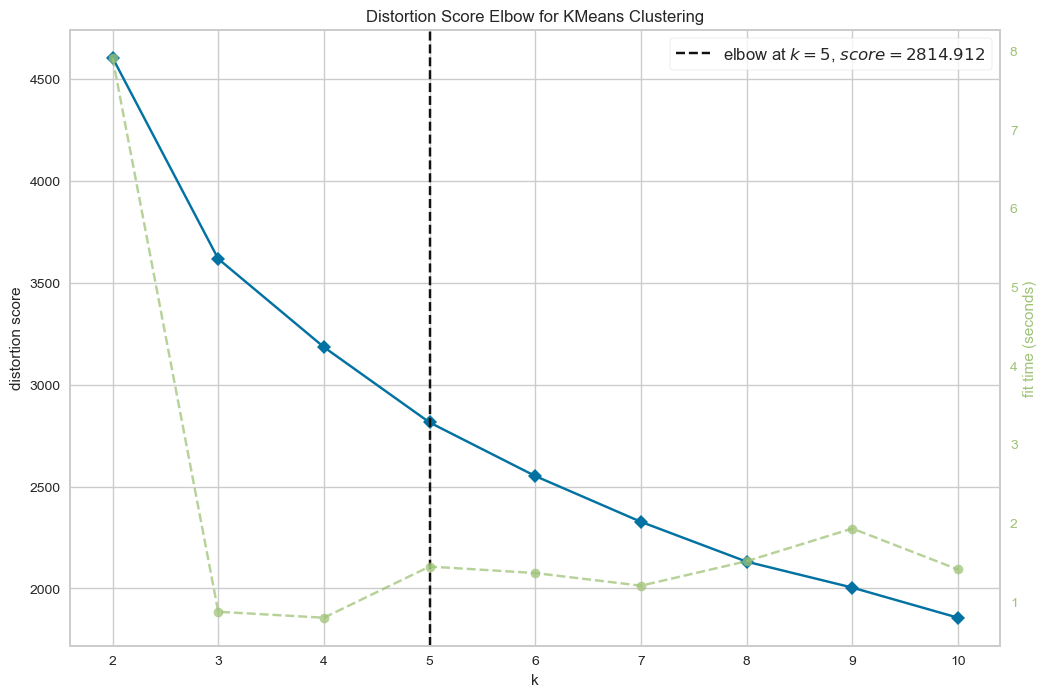

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()

## So we will choose optimum number of cluster as k = 4

In [70]:
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed) 

## fit the data and adding back clusters to the data in clusters column

In [71]:
subset.head()

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,2
1,46344.0,1,1,60,No,Graduate,2
2,71613.0,0,0,49,Yes,Graduate,0
3,26646.0,1,0,30,Yes,Graduate,3
4,58293.0,1,0,33,Yes,Postgraduate,0


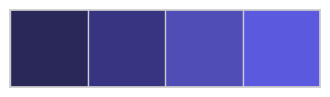

In [72]:
palette = sns.color_palette(["#292859",'#373482','#504DB6','#5B59DD'])
sns.palplot(palette) 

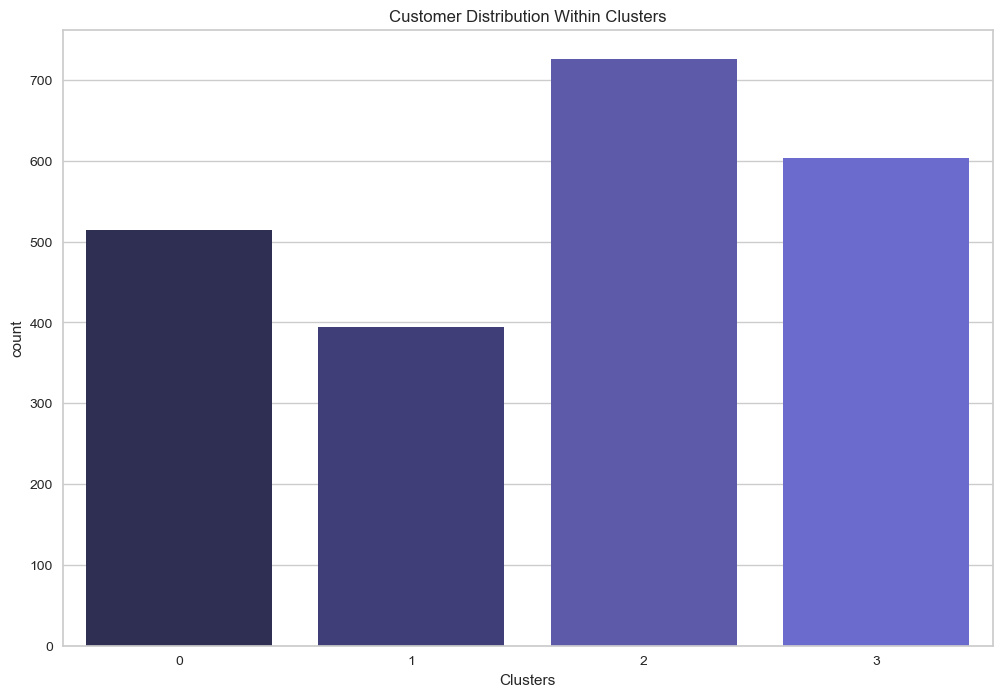

In [73]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=subset, palette=palette)
plt.title('Customer Distribution Within Clusters')
plt.show()

# Observation 

## Cluster 2 has highest number of customers
## Cluster 1 has least number of customers

## Lets find out what number of customers in each cluster have how many Kids or Teens in household, how many of them have partner and their education level

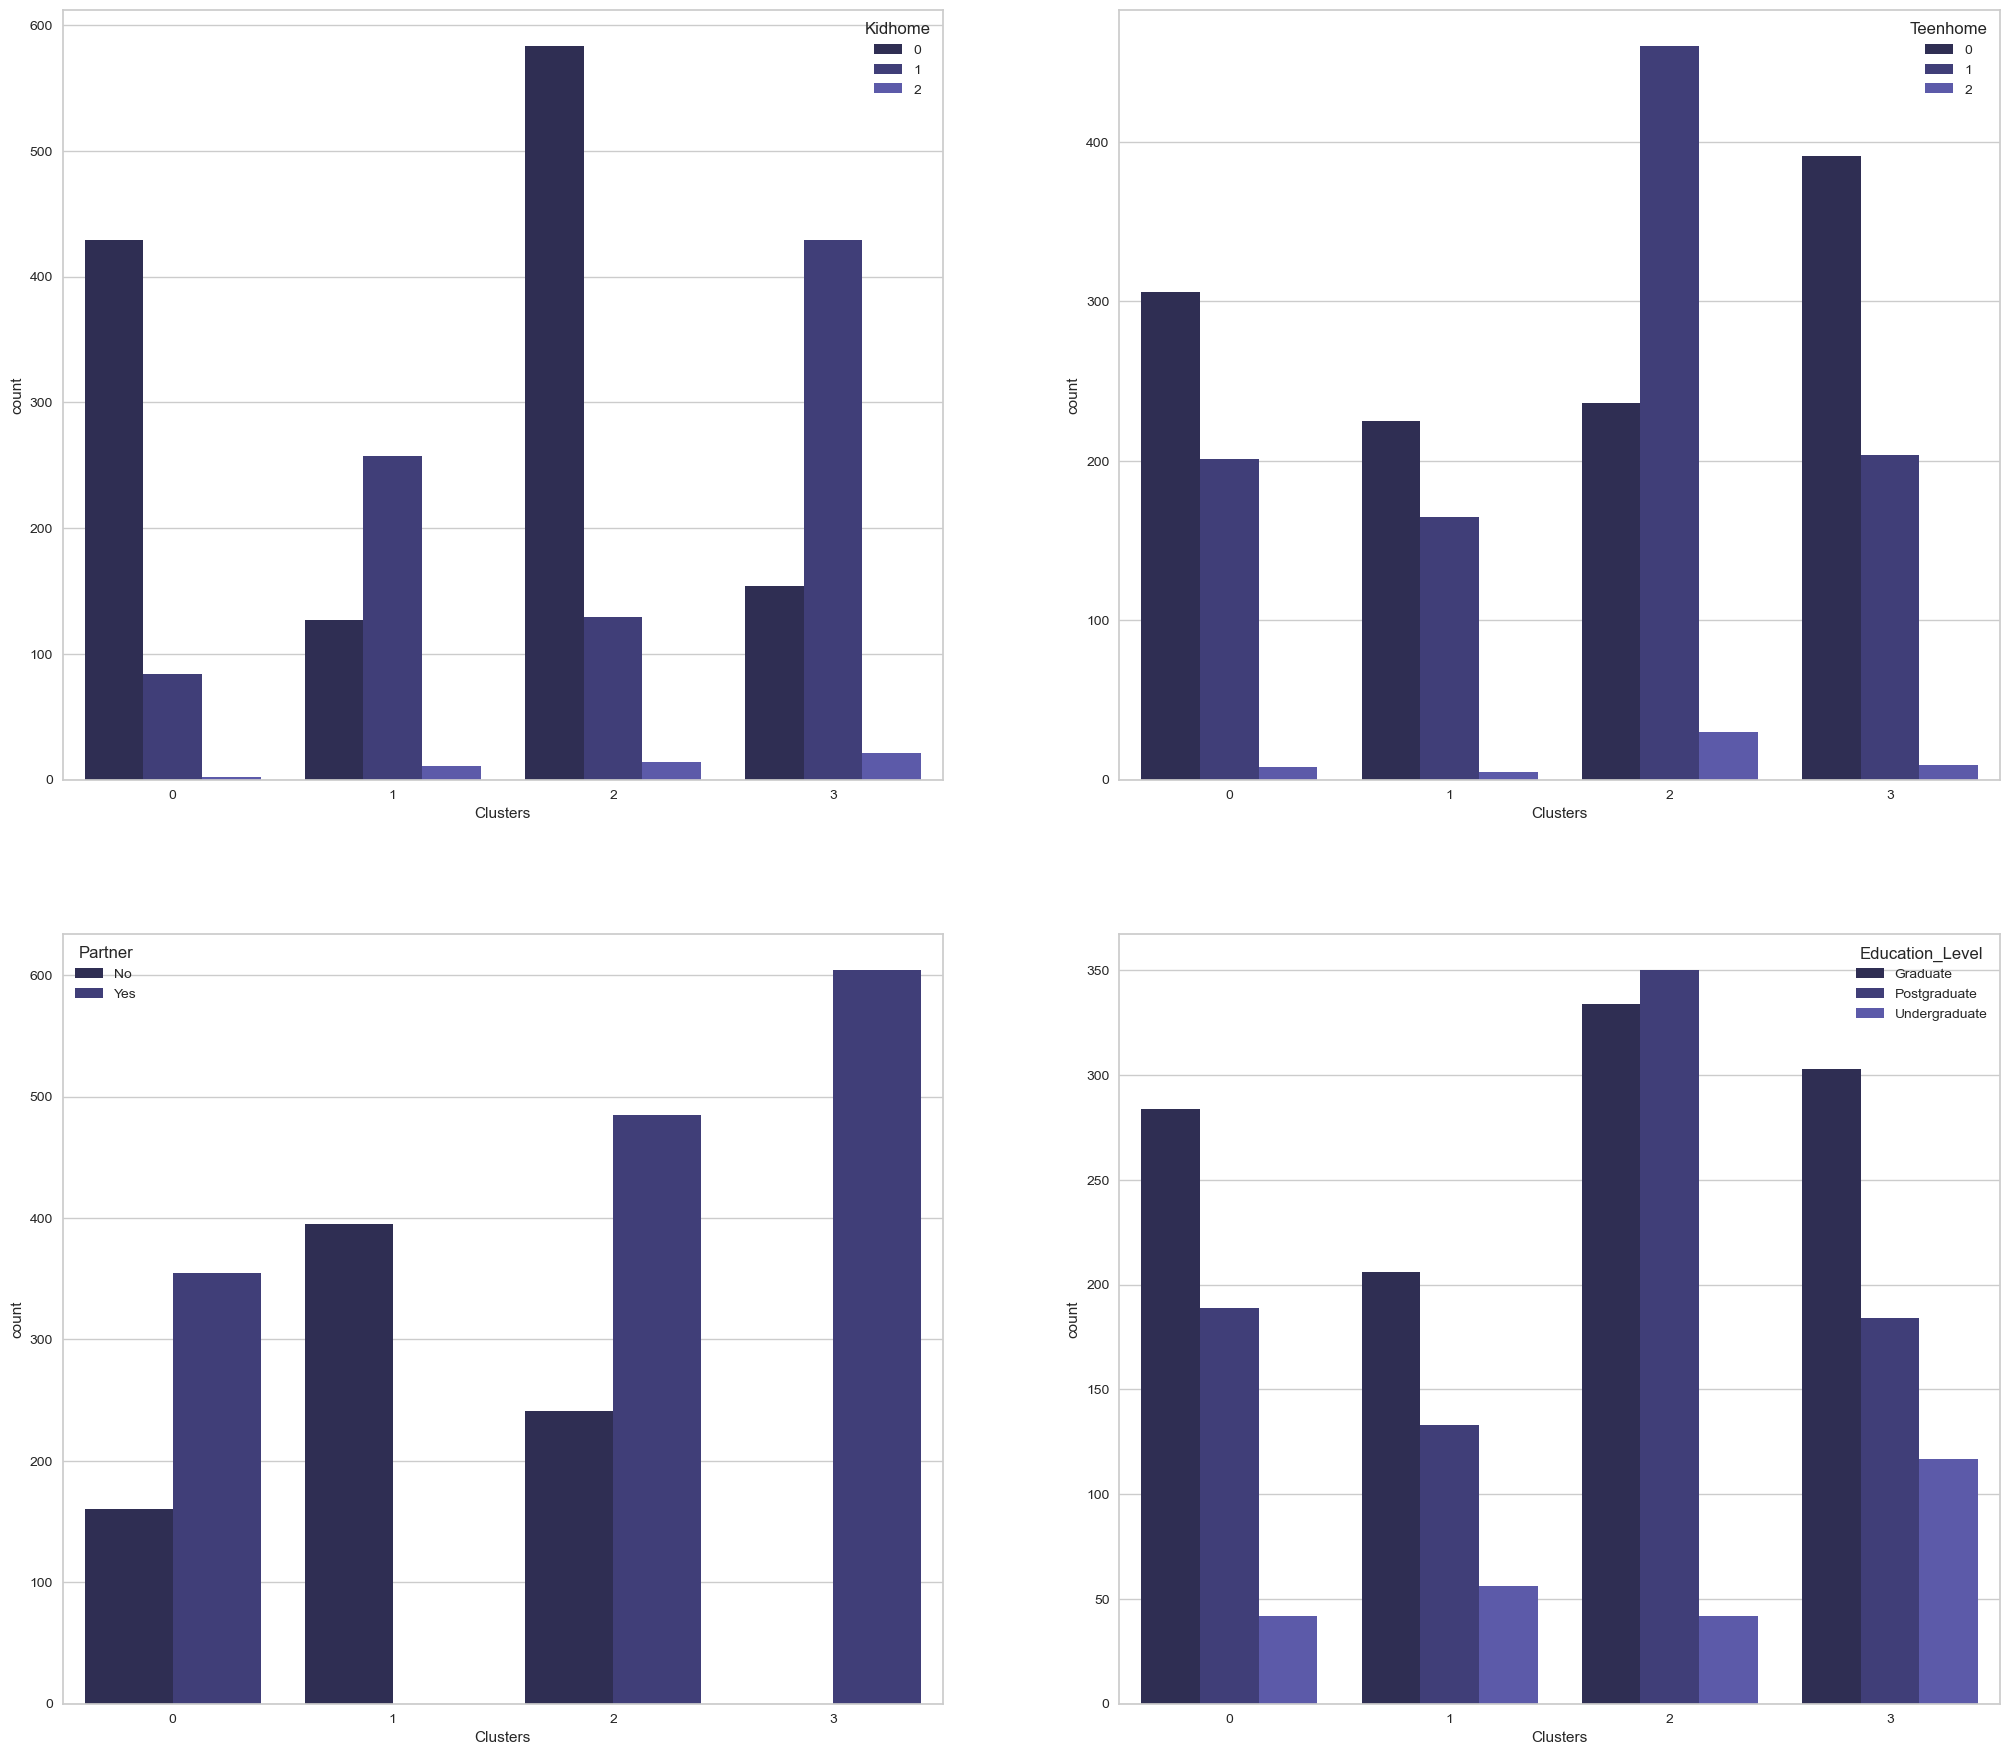

In [74]:
count_cols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(count_cols):
    sns.countplot(x='Clusters', data=subset, ax=ax1[i//2, i%2],hue=col,palette=palette)
    
plt.show()

# Observation

## 1. Education_Level: All clusters have customers with graduate, postgraduate and undergraduate background 

## 2. Kidhome: Cluster 0 mostly has customers with 1 kid in household  Cluster 1 has customers with no kids in household  Cluster 2 also has large number of customers with no kids in household  Cluster 3 has customers with 0 and 1 kids in household 

## 3. Partner: All the customers in cluster 0 have partner All The customers in cluster 3 have no partner  Cluster 1 & 2 has customers with and without partner, but most of them have partner

## Find out the customers which have kids in different clusters

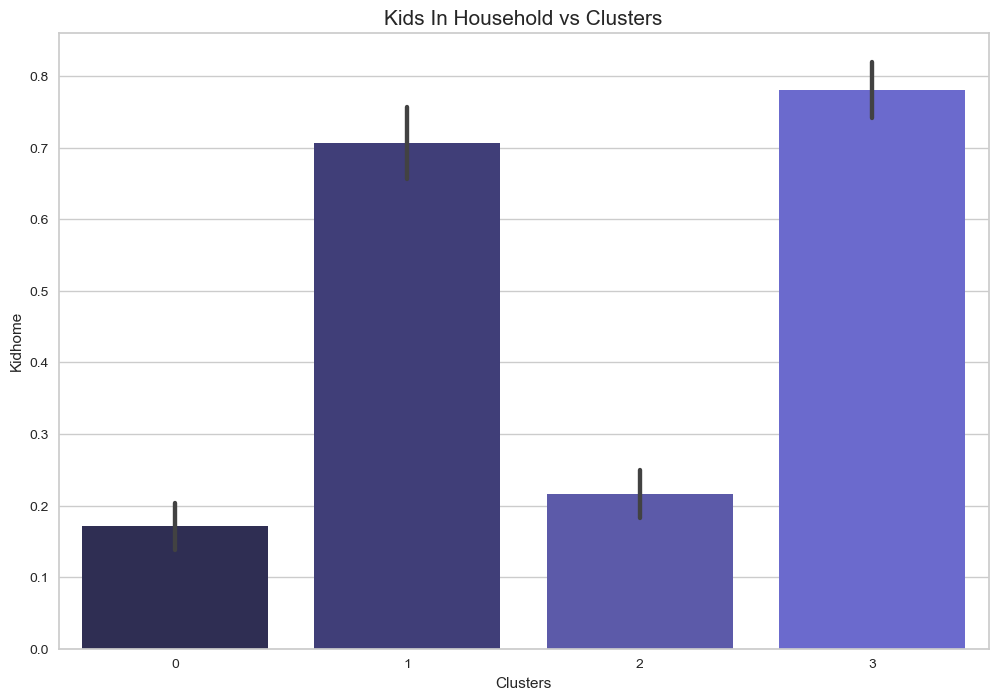

In [75]:
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Kidhome"],palette=palette)
plt.title("Kids In Household vs Clusters", size=15)
plt.show()

# Observation 

## 1. Cluster 1 and cluster 3 has maximum number of customers with kids in household
## 2. Cluster 0 and cluster 2 has least number of customers with kids in household

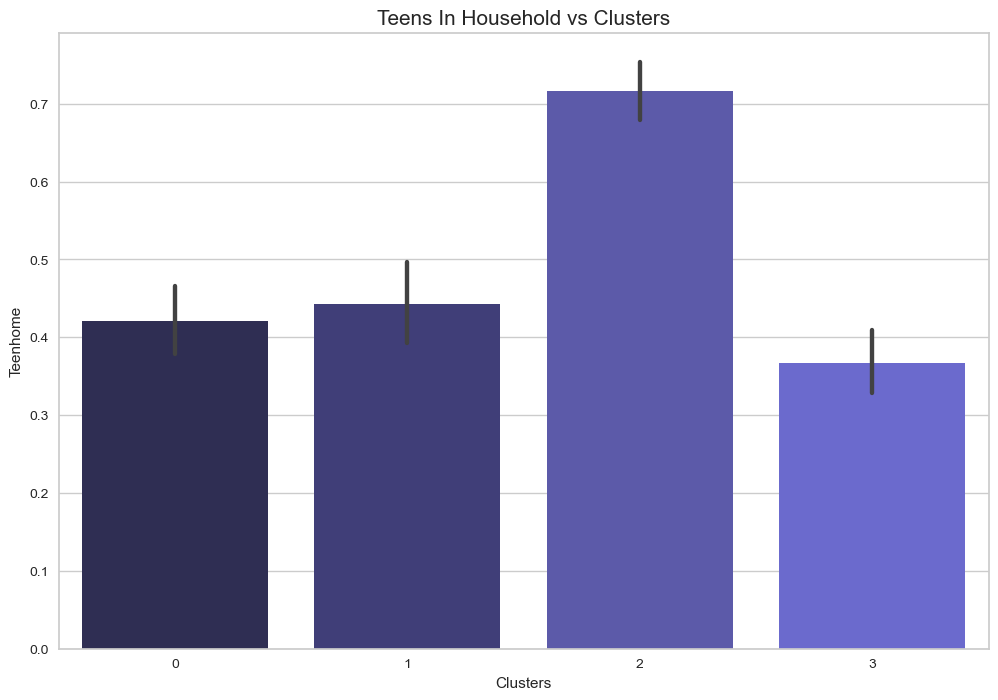

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Teenhome"],palette=palette)
plt.title("Teens In Household vs Clusters", size=15)
plt.show()

# Observations 

## 1. Cluster 2 has maximum number of customers having Teens in household

## 2. Remaining Clusters also have customers with Teens in household but they are less as compared to cluster 2

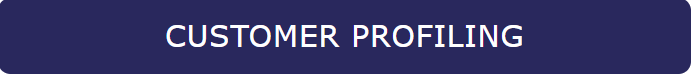

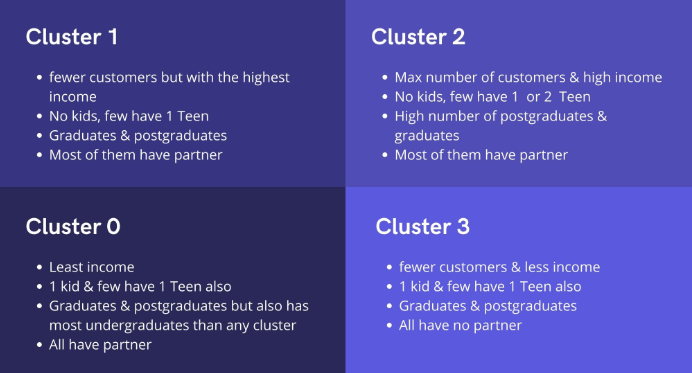

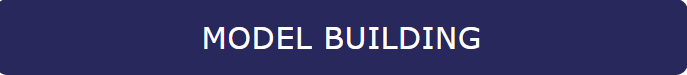

# build a multi classification model that will predict the cluster for given input of perticular customer

# Steps involved

## 1. Import required libraries

## 2. Separate features and target column (Clusters)

## 3. Create train and test data by spliting

## 4. Just add gradient boosting classifier to existing transformer pipeline

## 5.Fit data to the new pipeline

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
x = subset.drop('Clusters', axis=1)
y = subset['Clusters']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [80]:
final_pipeline = make_pipeline(transformer, GradientBoostingClassifier())

In [81]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

# Accuracy of our model

In [85]:
final_pipeline.score(x_test, y_test)

0.9747023809523809

## Now export this pipeline with all the transformation and trained model¶

In [83]:
import pickle

In [89]:
filename = 'classifier.pkl'

In [90]:
pickle.dump(final_pipeline, open(filename,'wb')) 

In [87]:
import sklearn
print(sklearn.__version__)


1.3.0


NameError: name 'classifier' is not defined

In [103]:
print(f"scikit-learn version: {sklearn.__version__}")
import pickle

scikit-learn version: 1.3.0


In [102]:
filename = 'classifier.pkl'

In [101]:

with open(filename, 'wb') as file:
    pickle.dump((final_pipeline, sklearn.__version__), file)

In [100]:
print(f"Model and version information saved to {filename}")

Model and version information saved to classifier.pkl
